In [2]:
from gensim.models import Word2Vec

In [3]:
# define training data
sentences = [['this','is','the','first','sentence','for','word2vec'],
            ['this','is','the','second','sentence'],
            ['yet','another','sentence'],
            ['one','more','sentence'],
            ['and','the','final','sentence'],
            ]

In [4]:
# train model
model = Word2Vec(sentences,min_count = 1,size = 100,alpha = 0.025)
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


### Word2Vec Arguments
- size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window: (default 5) The maximum distance between a target word and words around the target word.
- min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- workers: (default 3) The number of threads to use while training.
- sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [5]:
words = list(model.wv.vocab) # wv - word vector
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [6]:
# access vector for one word
print(model['sentence'])

[-3.3606060e-03  4.6983841e-03 -1.0668146e-03 -4.9062609e-03
 -2.8184045e-04  4.2165760e-03 -3.6885270e-03 -2.4542683e-03
 -4.8693842e-03 -4.7206804e-03  2.4804140e-03 -3.3772006e-03
  4.9800826e-03 -1.3523344e-03  6.0589507e-04 -3.7288195e-03
 -4.9222792e-03  2.0879242e-03 -3.8226526e-03 -5.5221346e-04
  3.6559307e-03  3.9702404e-04 -2.5885508e-03  3.0353973e-03
  4.9198074e-03 -4.6481933e-03 -3.0356944e-03  3.0230281e-03
  2.7304983e-03  3.6015431e-03 -2.6467235e-03  2.2781927e-03
  9.2137867e-04 -3.6282842e-03  1.3845642e-03  4.8173717e-03
 -4.8157568e-03 -3.8610521e-04  2.7764833e-03 -3.7470683e-03
  1.5247632e-03  2.7892762e-03 -3.5079051e-04  4.2709075e-03
 -3.4979958e-04  3.4654515e-03 -4.8490078e-03 -2.4904152e-03
  2.5584173e-04 -3.4131107e-03 -3.6004272e-03  4.2889081e-03
  2.7872191e-03  3.9762631e-03  5.7377364e-04 -8.2568417e-04
 -8.5957779e-04  4.0180567e-03 -2.8106519e-03  5.7923689e-04
 -4.5625362e-04 -2.3852868e-03  4.2889994e-03  4.6638004e-03
  4.3368596e-03 -4.89003

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
# save model
model.save('word2vec_model.bin')

In [8]:
# load model
new_model = Word2Vec.load('word2vec_model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


## Visualize Word Embedding 

In [9]:
X = model[model.wv.vocab]
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-4.0073381e-03, -2.7016690e-03, -5.1103509e-04, ...,
        -3.1048302e-03, -2.5220306e-03,  1.6780233e-03],
       [ 1.4140931e-03, -4.5624697e-03,  4.7812690e-03, ...,
         4.2158486e-03, -8.9256566e-05,  6.1987108e-04],
       [ 2.6807920e-03,  2.2671309e-03,  3.8773990e-03, ...,
        -4.3645231e-03,  4.8415000e-03, -1.3969666e-03],
       ...,
       [-3.3973439e-03, -2.8565302e-03, -2.9368754e-03, ...,
        -3.1032376e-03, -3.1234354e-03,  3.7354289e-03],
       [-1.5073258e-03, -2.7750039e-03,  4.9358085e-03, ...,
        -1.8151647e-03,  2.9579871e-03, -1.5321200e-03],
       [-1.8809932e-04, -3.4625446e-03, -2.9317862e-03, ...,
         4.7212220e-03,  2.5643264e-03,  4.1871434e-03]], dtype=float32)

In [10]:
X.shape

(14, 100)

In [12]:
# Plot Word Vectors Using PCA
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components = 2)
result = pca.fit_transform(X)
result

array([[ 0.00959416,  0.00112719],
       [ 0.00180611, -0.01504014],
       [ 0.01305461,  0.00879171],
       [-0.01034011, -0.00545943],
       [ 0.0052521 ,  0.02622022],
       [-0.00489392,  0.00438033],
       [ 0.0200015 , -0.00904693],
       [ 0.00010473, -0.00552054],
       [-0.00742948, -0.00596144],
       [-0.00615274, -0.00132203],
       [-0.01831185,  0.0065516 ],
       [-0.00045451, -0.00238195],
       [-0.00784369,  0.00074507],
       [ 0.00561309, -0.00308366]], dtype=float32)

- The resulting projection can be plotted using Matplotlib as follows, pulling out the two dimensions as x and y coordinates.

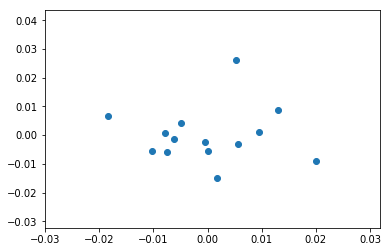

In [13]:
plt.scatter(result[:,0],result[:,1])

In [14]:
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


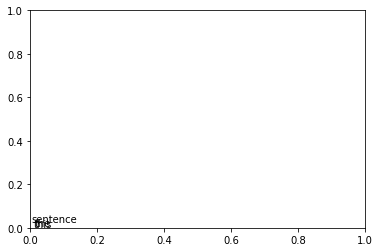

In [17]:
for index,word in enumerate(words):
    plt.annotate(word,xy = (result[index,0],result[index,1]))
plt.show()

In [ ]:
plt.annotate(word, xy = (result[]))